Homework 3
==========

In this homework...


* Model experimental data of the mobility versus field and temperature for conjugated polymer materials using multivariable linear regression
* Assess the goodness of fit of linear models

Problem statement
-----------------------
1. Plot the square root of the electric field $\left(\sqrt{F}\right)$ versus the mobility $\left(\mu_H\right)$ for data points only at temperatures of 173, 273, and 343. Plot all three on the same plot and include a legend denoting which points are at which temperature.


2. Perform a multi-variable linear regression to predict $\log_{10}(\mu_{H})$ from the variables $\sqrt{F} / T^{2}$ and $1/T^{2}$ using $\textit{all}$ of the data. Create a copy of the same plot from part 1 (again only temperatures 173, 273, and 343), and now add lines of best fit from this linear regression model.

    
3. Find the $R^2$ value of each of the 3 linear fits described above. ($\textbf{Note:}$ This can be done with the function sklearn.metrics.r2_score(). You can use Google to find the documentation of this function if you are unfamiliar.) Clearly report the $R^2$ values of each temperature.


4. Again perform a multi-variable linear regression to predict $\log_{10}(\mu_{H})$ from the variables $\sqrt{F} / T^{2}$and $1/T^{2}$ using $\textit{only data at or above a temperature of 273}$. Create a copy of the same plot from part 2 (only temperatures 173, 273, and 343), and add lines of best fit from this linear regression model. Report $R^2$ values for each fit.


5. Pick a new temperature besides 173, 273, or 343. Repeat the analysis from part 4, with the following changes:
    - Only plot the data and linear fit of your chosen temperature
    - Use a different range of 7 temperatures to train the linear model (besides those at 273 or above - for example, you could train the model on temperatures at or below 243)
    - Report what temperature range you used for training and the $R^2$ value of the fit
    - Repeat this 3 more times with different temperature ranges (you should have 4 total temperature ranges, plots, and $R^2$ values


Import the necessary modules

In [68]:
import numpy as np
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn import linear_model
import sklearn.metrics as metrics

Load the data [extracted from Fig 4 of Laquai, Frederic, Gerhard Wegner, and Heinz Bässler. "What determines the mobility of charge carriers in conjugated polymers?." Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences 365.1855 (2007): 1473-1487.]

In [69]:
file_name = 'data/conjpoly_mobility.csv'
names = ["field","temperature","mobility"]
data = pd.read_csv(file_name, header=None, names=names)
field = data.loc[:,"field"]
temperature = data.loc[:,"temperature"]
mobility = 10**data.loc[:,"mobility"]
alltemps = data.temperature.unique()
print(alltemps)

[173.  183.  203.  213.  223.  233.  243.  253.  263.  273.  296.6 303.
 313.  323.  333.  343. ]


1. Plot the square root of the electric field $\left(\sqrt{F}\right)$ versus the mobility $\left(\mu_H\right)$ for data points only at temperatures of 173, 273, and 343. Plot all three on the same plot and include a legend denoting which points are at which temperature.

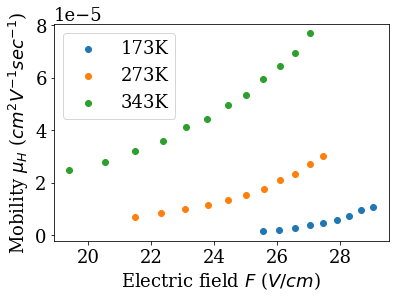

In [70]:
temps = [173,273,343]

plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for temp in temps:
    plt.scatter(np.sqrt(field[data['temperature']==temp]),mobility[data['temperature']==temp], label=str(temp)+'K')
    
plt.xlabel('Electric field ${F}$ ($V/cm$)')
plt.ylabel('Mobility $\mu_{H}$ ($cm^{2} V^{-1} sec^{-1}$)')

plt.legend()
plt.show()

2. Perform a multi-variable linear regression to predict $\log_{10}(\mu_{H})$ from the variables $\sqrt{F} / T^{2}$ and $1/T^{2}$ using $\textit{all}$ of the data. Create a copy of the same plot from part 1 (again only temperatures 173, 273, and 343), and now add lines of best fit from this linear regression model.

In [71]:
#for loop for each temp
num_exp = len(mobility)
tt = np.zeros((3,3))
mt = np.zeros(3)

for i_exp in range(num_exp):
    t_vec = np.array([1, np.sqrt(field[i_exp])/temperature[i_exp]**2,1/temperature[i_exp]**2])
    tt += np.outer(t_vec, t_vec) / num_exp
    mt += np.log10(mobility[i_exp]) * t_vec / num_exp
    
tt_inv = np.linalg.inv(tt)

In [72]:
a = np.dot(tt_inv, mt)

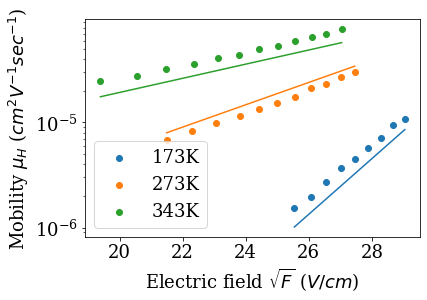

In [73]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for temp in temps:
    indices = np.where(data['temperature']==temp)
    plt.scatter(np.sqrt(field.iloc[indices]),mobility.iloc[indices], label=str(temp)+'K')
    fit_mobility = 10**(a[0] + a[1] * np.sqrt(field.iloc[indices])/temperature.iloc[indices] ** 2 
                       + a[2] / temperature.iloc[indices] ** 2)
    plt.plot(np.sqrt(field.iloc[indices]), fit_mobility)

plt.legend()
plt.xlabel('Electric field $\sqrt{F}$ ($V/cm$)')
plt.ylabel('Mobility $\mu_{H}$ ($cm^{2} V^{-1} sec^{-1}$)')
plt.yscale('log')

plt.show()

3. Find the $R^2$ value of each of the 3 linear fits described above. ($\textbf{Note:}$ This can be done with the function sklearn.metrics.r2_score(). You can use Google to find the documentation of this function if you are unfamiliar.) Clearly report the $R^2$ values of each temperature.

In [74]:
for temp in temps:
    indices = np.where(data['temperature']==temp)
    fit_mobility = 10**(a[0] + a[1] * np.sqrt(field.iloc[indices])/temperature.iloc[indices] ** 2 
                       + a[2] / temperature.iloc[indices] ** 2)
    R2 = r2_score(mobility.iloc[indices], fit_mobility)
    print('For T=' + str(temp) + 'K, R2=' + str(R2))

For T=173K, R2=0.7420852967211807
For T=273K, R2=0.8134678841305981
For T=343K, R2=0.44693037677028846


4. Again perform a multi-variable linear regression to predict $\log_{10}(\mu_{H})$ from the variables $\sqrt{F} / T^{2}$and $1/T^{2}$ using $\textit{only data at or above a temperature of 273}$. Create a copy of the same plot from part 2 (only temperatures 173, 273, and 343), and add lines of best fit from this linear regression model. Report $R^2$ values for each fit.

In [75]:
num_exp = len(mobility)
tt2 = np.zeros((3,3))
mt2 = np.zeros(3)

for i_exp in range(num_exp):
    if temperature[i_exp] >= 273:
        t_vec2 = np.array([1, np.sqrt(field[i_exp])/temperature[i_exp]**2,1/temperature[i_exp]**2])
        tt2 += np.outer(t_vec2, t_vec2) / num_exp
        mt2 += np.log10(mobility[i_exp]) * t_vec2 / num_exp
    
tt_inv2 = np.linalg.inv(tt2)

a2 = np.dot(tt_inv2, mt2)

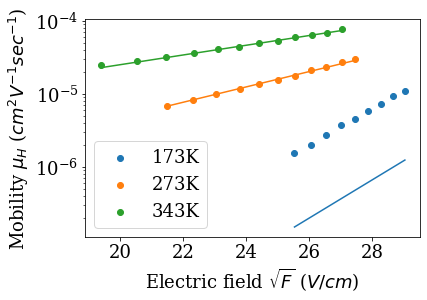

In [76]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

temps = [173,273,343]
for temp in temps:
    indices = np.where(data['temperature']==temp)
    plt.scatter(np.sqrt(field.iloc[indices]),mobility.iloc[indices], label=str(temp)+'K')
    fit_mobility = 10**(a2[0] + a2[1] * np.sqrt(field.iloc[indices])/temperature.iloc[indices] ** 2 
                       + a2[2] / temperature.iloc[indices] ** 2)
    plt.plot(np.sqrt(field.iloc[indices]), fit_mobility)

plt.legend()
plt.xlabel('Electric field $\sqrt{F}$ ($V/cm$)')
plt.ylabel('Mobility $\mu_{H}$ ($cm^{2} V^{-1} sec^{-1}$)')
plt.yscale('log')

plt.show()

In [44]:
for temp in temps:
    indices = np.where(data['temperature']==temp)
    fit_mobility = 10**(a2[0] + a2[1] * np.sqrt(field.iloc[indices])/temperature.iloc[indices] ** 2 
                       + a2[2] / temperature.iloc[indices] ** 2)
    R2 = r2_score(mobility.iloc[indices], fit_mobility)
    print('For T=' + str(temp) + 'K, R2=' + str(R2))

For T=173K, R2=-2.1227504387237928
For T=273K, R2=0.9932223161385257
For T=343K, R2=0.9949394105146769


5. Pick a new temperature besides 173, 273, or 343. Repeat the analysis from part 4, with the following changes:
    - Only plot the data and linear fit of your chosen temperature
    - Use a different range of 7 temperatures to train the linear model (besides those at 273 or above - for example, you could train the model on temperatures at or below 243)
    - Report what temperature range you used for training and the $R^2$ value of the fit
    - Repeat this 3 more times with different temperature ranges (you should have 4 total temperature ranges, plots, and $R^2$ values


Chosen temp being fitted: 213
Temp range for training:
203.0
213.0
223.0
233.0
243.0
253.0
263.0
R2=0.9976968619482411


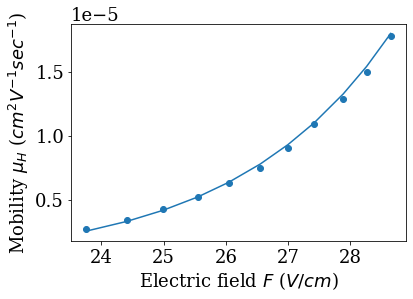

In [77]:
#Range doesnt have to be continuous, hold one temp constant
#Choose any 7 temps of 15
#temps[:,[1:8]] etc
temp = 213 #233, 333, 183

num_exp = len(mobility)
tt = np.zeros((3,3))
mt = np.zeros(3)

print('Chosen temp being fitted:', temp)
print('Temp range for training:')
count = 0
for i_exp in range(num_exp):
    if temperature[i_exp]>=203 and count<7:
        t_vec = np.array([1, np.sqrt(field[i_exp])/temperature[i_exp]**2,1/temperature[i_exp]**2])
        tt += np.outer(t_vec, t_vec) / num_exp
        mt += np.log10(mobility[i_exp]) * t_vec / num_exp
        if count ==0 or temperature[i_exp] != temperature[i_exp-1]:
            count+=1
            print(temperature[i_exp])
        
tt_inv = np.linalg.inv(tt)
a = np.dot(tt_inv, mt)

#plot regression
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

indices = np.where(data['temperature']==temp)
plt.scatter(np.sqrt(field.iloc[indices]),mobility.iloc[indices], label=str(temp)+'K')
fit_mobility = 10**(a[0] + a[1] * np.sqrt(field.iloc[indices])/temperature.iloc[indices] ** 2 
                   + a[2] / temperature.iloc[indices] ** 2)

R2 = r2_score(mobility.iloc[indices], fit_mobility)
print('R2=' + str(R2))
plt.plot(np.sqrt(field.iloc[indices]), fit_mobility)

plt.xlabel('Electric field $F$ ($V/cm$)')
plt.ylabel('Mobility $\mu_{H}$ ($cm^{2} V^{-1} sec^{-1}$)')

plt.show()

Chosen temp being fitted: 233
Temp range for training:
173.0
183.0
203.0
213.0
223.0
233.0
243.0
R2=0.9859845718113345


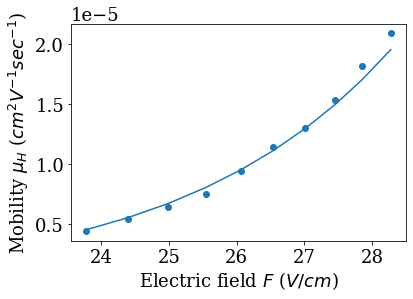

In [78]:
temp = 233 #333, 183

num_exp = len(mobility)
tt = np.zeros((3,3))
mt = np.zeros(3)

print('Chosen temp being fitted:', temp)
print('Temp range for training:')
count = 0
for i_exp in range(num_exp):
    if temperature[i_exp]<343 and count<7:
        t_vec = np.array([1, np.sqrt(field[i_exp])/temperature[i_exp]**2,1/temperature[i_exp]**2])
        tt += np.outer(t_vec, t_vec) / num_exp
        mt += np.log10(mobility[i_exp]) * t_vec / num_exp
        if temperature[i_exp] != temperature[i_exp+1]:
            count+=1
            print(temperature[i_exp])
        
tt_inv = np.linalg.inv(tt)
a = np.dot(tt_inv, mt)

#plot regression
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

indices = np.where(data['temperature']==temp)
plt.scatter(np.sqrt(field.iloc[indices]),mobility.iloc[indices], label=str(temp)+'K')
fit_mobility = 10**(a[0] + a[1] * np.sqrt(field.iloc[indices])/temperature.iloc[indices] ** 2 
                   + a[2] / temperature.iloc[indices] ** 2)

R2 = r2_score(mobility.iloc[indices], fit_mobility)
print('R2=' + str(R2))
plt.plot(np.sqrt(field.iloc[indices]), fit_mobility)

plt.xlabel('Electric field $F$ ($V/cm$)')
plt.ylabel('Mobility $\mu_{H}$ ($cm^{2} V^{-1} sec^{-1}$)')

plt.show()

Chosen temp being fitted: 183
Temp range for training:
223.0
233.0
243.0
253.0
263.0
273.0
296.6
R2=0.09547322115308787


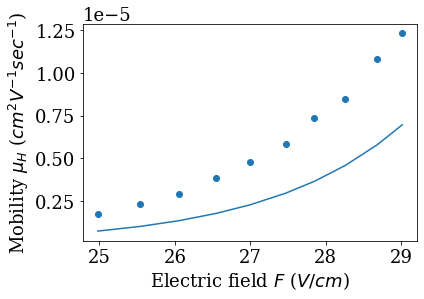

In [79]:
temp = 183 #333

num_exp = len(mobility)
tt = np.zeros((3,3))
mt = np.zeros(3)

print('Chosen temp being fitted:', temp)
print('Temp range for training:')
count = 0
for i_exp in range(num_exp):
    if temperature[i_exp]>213 and count<7:
        t_vec = np.array([1, np.sqrt(field[i_exp])/temperature[i_exp]**2,1/temperature[i_exp]**2])
        tt += np.outer(t_vec, t_vec) / num_exp
        mt += np.log10(mobility[i_exp]) * t_vec / num_exp
        if temperature[i_exp] != temperature[i_exp+1]:
            count+=1
            print(temperature[i_exp])
        
tt_inv = np.linalg.inv(tt)
a = np.dot(tt_inv, mt)

#plot regression
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

indices = np.where(data['temperature']==temp)
plt.scatter(np.sqrt(field.iloc[indices]),mobility.iloc[indices], label=str(temp)+'K')
fit_mobility = 10**(a[0] + a[1] * np.sqrt(field.iloc[indices])/temperature.iloc[indices] ** 2 
                   + a[2] / temperature.iloc[indices] ** 2)

R2 = r2_score(mobility.iloc[indices], fit_mobility)
print('R2=' + str(R2))
plt.plot(np.sqrt(field.iloc[indices]), fit_mobility)

plt.xlabel('Electric field $F$ ($V/cm$)')
plt.ylabel('Mobility $\mu_{H}$ ($cm^{2} V^{-1} sec^{-1}$)')

plt.show()

Chosen temp being fitted: 333
Temp range for training:
173.0
183.0
203.0
213.0
223.0
233.0
243.0
R2=-1.7274481851646568


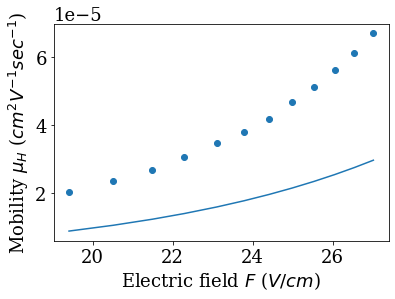

In [81]:
temp = 333

num_exp = len(mobility)
tt = np.zeros((3,3))
mt = np.zeros(3)

print('Chosen temp being fitted:', temp)
print('Temp range for training:')
count = 0
for i_exp in range(num_exp):
    if temperature[i_exp]<263 and count<7:
        t_vec = np.array([1, np.sqrt(field[i_exp])/temperature[i_exp]**2,1/temperature[i_exp]**2])
        tt += np.outer(t_vec, t_vec) / num_exp
        mt += np.log10(mobility[i_exp]) * t_vec / num_exp
        if temperature[i_exp] != temperature[i_exp+1]:
            count+=1
            print(temperature[i_exp])
        
tt_inv = np.linalg.inv(tt)
a = np.dot(tt_inv, mt)

#plot regression
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

indices = np.where(data['temperature']==temp)
plt.scatter(np.sqrt(field.iloc[indices]),mobility.iloc[indices], label=str(temp)+'K')
fit_mobility = 10**(a[0] + a[1] * np.sqrt(field.iloc[indices])/temperature.iloc[indices] ** 2 
                   + a[2] / temperature.iloc[indices] ** 2)

R2 = r2_score(mobility.iloc[indices], fit_mobility)
print('R2=' + str(R2))
plt.plot(np.sqrt(field.iloc[indices]), fit_mobility)

plt.xlabel('Electric field $F$ ($V/cm$)')
plt.ylabel('Mobility $\mu_{H}$ ($cm^{2} V^{-1} sec^{-1}$)')

plt.show()